In [1]:
from scipy.io import arff
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import time

In [2]:
data1 = arff.loadarff(open('datasets/artificial/R15.arff','r'))
data2 = arff.loadarff(open('datasets/artificial/diamond9.arff','r'))
data3 = arff.loadarff(open('datasets/artificial/spherical_4_3.arff','r')) 

#Bad datasets
data4 = arff.loadarff(open('datasets/artificial/spiral.arff','r'))
data5 = arff.loadarff(open('datasets/artificial/cluto-t7-10k.arff','r')) 


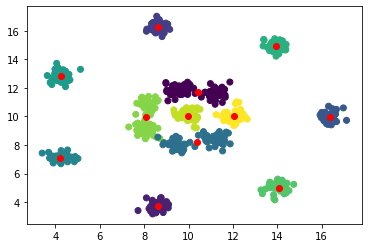

In [3]:
df = pd.DataFrame(data1[0])
#print(df)
X1, Y1 = [], []
X, Y = df['x'], df['y']

kmeans = KMeans(n_clusters = 12, random_state=0).fit(df)

plt.plot(X1, Y1)
plt.scatter(X, Y, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='r')

In [5]:
data = data5
df = pd.DataFrame(data[0])
X, Y = df['x'], df['y']
print(df)

X2, Y2 = [], []

j = 20

for i in range(1,j):
    kmeans = KMeans(n_clusters = i, random_state=0).fit(df)
    X2.append(i)
    Y2.append(kmeans.inertia_)
    
max_iner = Y2[0]
pourcentage = 0.05
best_cluster_number = len(Y2)

for i in range(1, len(Y2)):
    
    ecart = Y2[i - 1] - Y2[i]  
    print(f"i = {i}, Y2-1 = {Y2[i - 1]}, Y2 = {Y2[i]}")
    if (ecart < Y2[i - 1] * pourcentage):
        print(f"Le meilleur nombre de cluster est {i}")
        best_cluster_number = i
        break

plt.figure()
plt.plot(X2, Y2)

kmeans = KMeans(n_clusters = best_cluster_number, random_state=0).fit(df)
plt.figure()
plt.scatter(X, Y, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='r')

               x           y CLASS
0     539.512024  411.975006  b'1'
1     542.241028  147.626007  b'2'
2     653.468994  370.727997  b'0'
3     598.585999  284.882996  b'1'
4     573.062988  294.562988  b'1'
...          ...         ...   ...
9995  451.783997  372.544006  b'6'
9996  550.674988  327.447998  b'1'
9997  474.742004  161.518005  b'3'
9998  535.835022  375.765991  b'1'
9999  234.878006  181.878006  b'8'

[10000 rows x 3 columns]


ValueError: could not convert string to float: b'noise'

In [ ]:
time_tab = []

time_start = time.time()
n = 20

for i in range(1,n):
    time_start = time.time()
    kmeans = KMeans(n_clusters = i, random_state=0).fit(df)
    X1.append(i)
    Y1.append(kmeans.inertia_)
    time_end = time.time()
    time_exec = time_end - time_start
    time_tab.append(time_exec)
    
print(time_tab)
    
    
X = np.linspace(1,n - 1,n - 1)
plt.figure()
plt.plot(X, time_tab)